In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image # To help convert image to nparray
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.inception_resnet_v2 import decode_predictions #To convert predict outcome to label

Using TensorFlow backend.


In [2]:
model = InceptionResNetV2(weights='imagenet', include_top=True)
model.summary()

225214464/225209952 [==============================] - 18s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________

In [3]:
tf.keras.utils.plot_model(model, 'InceptionResNetV2_model.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.588943 to fit



In [4]:
!git clone https://github.com/niazwazir/ClassificationImages.git #Here these images are available car.jpeg  cobra.jpeg  Elephant.jpeg  lion.jpeg

Cloning into 'ClassificationImages'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [0]:
img = image.load_img('ClassificationImages/cobra.jpeg', target_size=(299, 299))

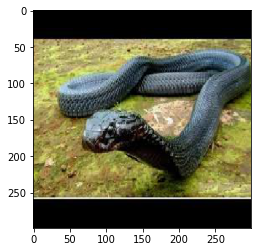

In [6]:
#loading and preprocessing cat image
IMAGE_PATH='ClassificationImages/cobra.jpeg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299, 299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/255.)

In [0]:
x = image.img_to_array(img) # (299, 299, 3)
x = np.expand_dims(x, axis=0) # (1, 299, 299, 3)
x = preprocess_input(x) # (1, 299, 299, 3)

In [8]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01748264', 'Indian_cobra', 0.84433573), ('n01756291', 'sidewinder', 0.034162868), ('n01753488', 'horned_viper', 0.026718443)]
